# Board Game Review Prediction

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import sklearn 

In [2]:
print('python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.13.3
Pandas: 0.20.3
Matplotlib: 2.1.0
Seaborn: 0.8.0
Sklearn: 0.19.1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Load The Data
df = pandas.read_csv("games.csv")

In [5]:
print(df.columns)
print(df.shape)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [6]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [7]:
df=df._get_numeric_data()

In [8]:
df =df.drop('id',axis=1)

In [9]:
df.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
df.dtypes

yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object

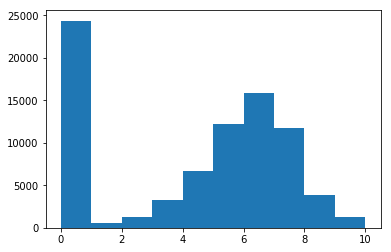

In [11]:
# Make a histogram of all the rating in the average_rating Columns
plt.hist(df["average_rating"])

plt.show()

In [12]:
# Print the first row of all games with zero scores
print(df[df["average_rating"] == 0].iloc[0])

# Print the first row of all games with zero scores greater than 0
print(df[df["average_rating"] > 0].iloc[0])

yearpublished           0.0
minplayers              0.0
maxplayers              0.0
playingtime             0.0
minplaytime             0.0
maxplaytime             0.0
minage                  0.0
users_rated             0.0
average_rating          0.0
bayes_average_rating    0.0
total_owners            0.0
total_traders           0.0
total_wanters           0.0
total_wishers           1.0
total_comments          0.0
total_weights           0.0
average_weight          0.0
Name: 13048, dtype: float64
yearpublished            2005.00000
minplayers                  2.00000
maxplayers                  2.00000
playingtime               180.00000
minplaytime               180.00000
maxplaytime               180.00000
minage                     13.00000
users_rated             20113.00000
average_rating              8.33774
bayes_average_rating        8.22186
total_owners            26647.00000
total_traders             372.00000
total_wanters            1219.00000
total_wishers            586

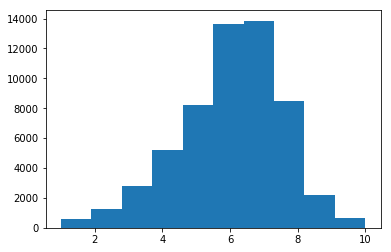

In [13]:
# Removes any rows whithout usre reviews
df = df[df["users_rated"] > 0]

#remove any rows with missing values
df = df.dropna(axis=0)

# Make a histogram of all average ratings

plt.hist(df["average_rating"])
plt.show()

In [14]:
df.columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'bayes_average_rating', 'total_owners', 'total_traders',
       'total_wanters', 'total_wishers', 'total_comments', 'total_weights',
       'average_weight'],
      dtype='object')

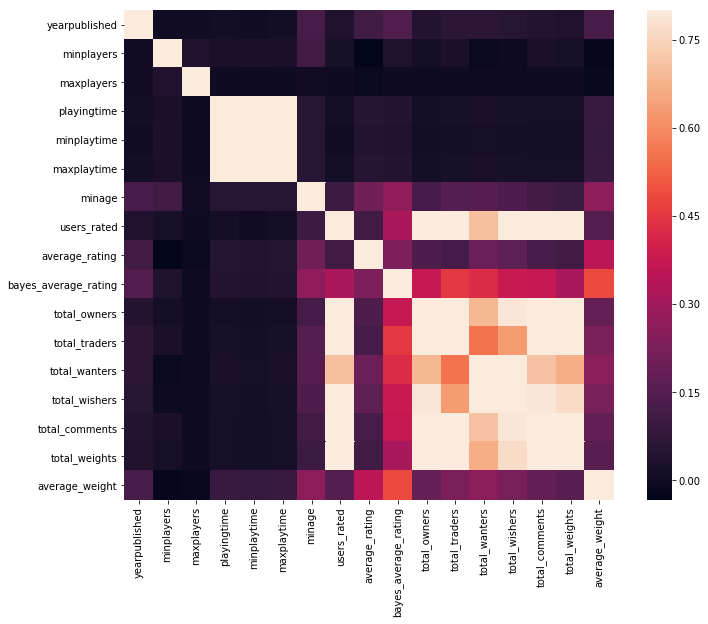

In [15]:
# Corelation matrixs
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
# Get all the columns from the dataset
columns = df.columns.tolist()

#filter the columns to raemove data we do not want
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type"]]

# Store the variable we'll be predicting on
target = ["average_rating"]

In [17]:
# Generate training and test dataset
from sklearn.model_selection import train_test_split

# Generate traning set
X_train = df.sample(frac=0.8, random_state = 1)

# Select anything not in the traning set and put in test
y_test = df.loc[~df.index.isin(X_train.index)]

# Print shape
print("number of test samples :", X_train.shape[0:])
print("number of training samples:",y_test.shape[0:])

number of test samples : (45544, 17)
number of training samples: (11386, 17)


In [18]:
# Import Leniar regrassion model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

# Fit the model the training data
LR.fit(X_train[columns], X_train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Generate predictions for the test set
predictions = LR.predict(y_test[columns])

# Compute error between our test predictions and actual value
mean_squared_error(predictions, y_test[target])

2.1037979217684089

In [20]:
# Import Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model class
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

# Fit the model the training data
RFR.fit(X_train[columns], X_train[target])

C:\Users\Alok\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [21]:
# Make predictions
predictions = RFR.predict(y_test[columns])

# Compute error between our test predictions and actual value
mean_squared_error(predictions, y_test[target])

1.4600730033023266

In [22]:
y_test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [23]:
# Make prediction with both models
rating_LR = LR.predict(y_test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(y_test[columns].iloc[0].values.reshape(1, -1))

# Print out the predictions
print(rating_LR)
print(rating_RFR)

[[ 8.10163107]]
[ 7.94222312]


In [24]:
y_test[target].iloc[0]

average_rating    8.07933
Name: 9, dtype: float64

### Thanks
### By Alok Ranjan Bhoi